# Homework 5 Solutions
###### MSEN 330, Fall 2021
###### Daniel Willhelm (TA)

## (1) 
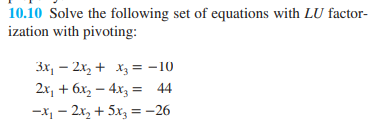

In [ ]:
import numpy as np 
from scipy.linalg import lu_solve
from scipy.linalg import lu

def LU_solve(A,b): 
  P,L,U = lu(A)
  x = np.linalg.inv(U)@(np.linalg.inv(L)@b)
  return P,L,U,x

A = np.array([[3.0, -2.0, 1.0],
              [2.0, 6.0, -4.0],
              [-1.0, -2.0, 5.0]])

b = np.array([-10,44,-26])

_,_,_,x = LU_solve(A,b)

print(f'(x1, x2, x3) = {x}')


(x1, x2, x3) = [ 1.  5. -3.]


## (2)

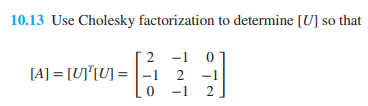

In [ ]:
from scipy.linalg import cholesky

A = np.array([[2.,-1.,0.],
              [-1.,2.,-1.,],
              [0.,-1.,2.]])

# depending on the input params, scipy cholesky returns the L or U diagonal matrix. 
U = cholesky(A,lower=False) # lower = False returns upper diagonal (U)

print(f'A = \n{A}\n')
print(f'U = \n{U}\n')

# show that U^T@U == A 
print(f'A = U.T@U = \n{U.T@U}\n')



A = 
[[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]

U = 
[[ 1.41421356 -0.70710678  0.        ]
 [ 0.          1.22474487 -0.81649658]
 [ 0.          0.          1.15470054]]

A = U.T@U = 
[[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]



## (3) 

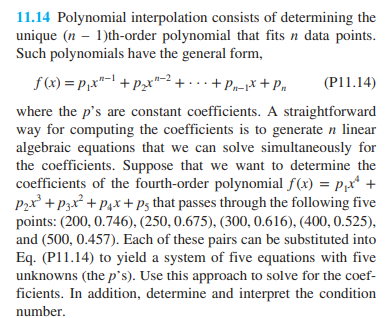

In [ ]:
# build A matrix
A = [] 
for i in [200,250,300,400,500]: 
  A.append([i**4,i**3,i**2,i,1])
A = np.array(A,dtype=float)

# build p matrix: 
b = np.array([0.746,0.675,0.616,0.525,0.457])

x = np.linalg.solve(A,b)

print(f'A = \n{A}')
print(f'\nb = \n{b}')
print(f'\nx = \n{x}')
print('')
print(f'f(x) = {x[0]:.3}x^4 + {x[1]:.3}x^3 + {x[2]:.3}x^2 + {x[3]:.3}x + {x[4]:.3}')


A = 
[[1.60000e+09 8.00000e+06 4.00000e+04 2.00000e+02 1.00000e+00]
 [3.90625e+09 1.56250e+07 6.25000e+04 2.50000e+02 1.00000e+00]
 [8.10000e+09 2.70000e+07 9.00000e+04 3.00000e+02 1.00000e+00]
 [2.56000e+10 6.40000e+07 1.60000e+05 4.00000e+02 1.00000e+00]
 [6.25000e+10 1.25000e+08 2.50000e+05 5.00000e+02 1.00000e+00]]

b = 
[0.746 0.675 0.616 0.525 0.457]

x = 
[ 1.33333333e-12 -4.53333333e-09  5.29666667e-06 -3.17366667e-03
  1.20300000e+00]

f(x) = 1.33e-12x^4 + -4.53e-09x^3 + 5.3e-06x^2 + -0.00317x + 1.2


## (4) 
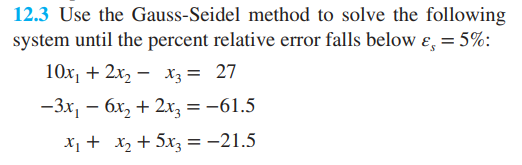

In [ ]:
import numpy as np
import pandas as pd 

def gauss_seidel(A,b,tol=1e-3,max_iter=100): 
  res = [] 
  x_old = np.zeros_like(b)
  for i in range(max_iter): 
    L = np.tril(A,)
    U = np.triu(A,k=1)
    x = np.linalg.inv(L) @ (b - U@x_old)
    
    # calculate error: 
    err = [] 
    for i in range(x.shape[0]):
      e = 100 * abs(x[i] - x_old[i])/x[i] 
      err.append(e)
    err = np.array(err).max()
   
    res.append(list(x)+[err])
   
    if np.allclose(x, x_old, rtol=tol,atol=tol):
      break
    x_old = x
  res = pd.DataFrame(res, columns=[f'x{i+1}' for i in range(len(x))]+['Ea_max'])
  print(res)
  return x,res

# solve
A = np.array([[10,2,-1],[-3,-6,2],[1,1,5]],dtype=float)
b = np.array([27,-61.5,-21.5],dtype=float)
x,res = gauss_seidel(A,b)


print(f'\n(x1, x2, x3) = {x[:3]} ')
print('\n compare with:')
print(np.linalg.solve(A,b))

         x1        x2        x3      Ea_max
0  2.700000  8.900000 -6.620000  100.000000
1  0.258000  7.914333 -5.934467  946.511628
2  0.523687  8.010001 -6.006738   50.733899
3  0.497326  7.999091 -5.999283    5.300476
4  0.500253  8.000112 -6.000073    0.585185
5  0.499970  7.999990 -5.999992    0.056637

(x1, x2, x3) = [ 0.49997026  7.9999905  -5.99999215] 

 compare with:
[ 0.5  8.  -6. ]



## (5) 
image.png

In [ ]:
import numpy as np
import pandas as pd 

def jacobi_iter(A,b,tol=1e-3,max_iter=100): 
  res = [] 
  x_old = np.zeros_like(b)
  for i in range(max_iter): 
    D = np.diagflat(np.diag(A))
    x = np.linalg.inv(D) @ (b - (A-D)@x_old)
    
    # calculate error: 
    err = [] 
    for i in range(x.shape[0]):
      e = 100 * abs(x[i] - x_old[i])/x[i] 
      err.append(e)
    err = np.array(err).max()
   
    res.append(list(x)+[err])
   
    if np.allclose(x, x_old, rtol=tol,atol=tol):
      break
    x_old = x
  res = pd.DataFrame(res, columns=[f'x{i+1}' for i in range(len(x))]+['Ea_max'])
  print(res)
  return x,res

# solve
A = np.array([[10,2,-1],[-3,-6,2],[1,1,5]],dtype=float)
b = np.array([27,-61.5,-21.5],dtype=float)
x,res = jacobi_iter(A,b)


print(f'\n(x1, x2, x3) = {x[:3]} ')
print('\n compare with:')
print(np.linalg.solve(A,b))

         x1         x2        x3       Ea_max
0  2.700000  10.250000 -4.300000   100.000000
1  0.220000   7.466667 -6.890000  1127.272727
2  0.517667   7.843333 -5.837333    57.501610
3  0.547600   8.045389 -5.972200     5.466277
4  0.493702   7.985467 -6.018598    10.917062
5  0.501047   7.996950 -5.995834     1.465864
6  0.501027   8.000865 -5.999599     0.048941

(x1, x2, x3) = [ 0.5010267  8.0008653 -5.9995993] 

 compare with:
[ 0.5  8.  -6. ]


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('msen330_homework_5_solutions.ipynb')

--2021-04-19 03:06:09--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-04-19 03:06:10 (25.2 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/msen330_homework_5_solutions.ipynb to pdf
[NbConvertApp] Writing 204563 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] CRITICAL | xelatex failed: [u'xelatex', u'./notebook.tex'

'File Download Unsuccessful. Saved in Google Drive'